## TEAM CHALLENGE: LOST IN ML - TOOLBOX (I)

In [1]:
import pandas as pd
import numpy as np

from toolbox_ML import *

import warnings
warnings.filterwarnings("ignore")


In [2]:
df_estudiantes = pd.read_csv("./data/student_performance_data.csv")

In [3]:
df_estudiantes.sample(3)

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
2391,3392,16,1,0,2,17.819907,13,0,2,0,0,0,1,2.140014,1.0
1413,2414,18,1,3,3,13.414944,10,0,3,0,1,0,0,2.644194,2.0
1354,2355,16,1,1,2,18.191109,25,0,1,0,0,1,0,0.690348,4.0


In [4]:
df_estudiantes = df_estudiantes.drop('StudentID', axis=1)

--------------------

### Testeo de la función ***1.describe()***

In [5]:
describe_df(df_estudiantes)

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
DATA_TYPE,int64,int64,int64,int64,float64,int64,int64,int64,int64,int64,int64,int64,float64,float64
MISSINGS(%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
UNIQUE_VALUES,4,2,4,5,2392,30,2,5,2,2,2,2,2371,5
CARDIN(%),0.167,0.084,0.167,0.209,100.0,1.254,0.084,0.209,0.084,0.084,0.084,0.084,99.122,0.209


In [6]:
df_estudiantes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                2392 non-null   int64  
 1   Gender             2392 non-null   int64  
 2   Ethnicity          2392 non-null   int64  
 3   ParentalEducation  2392 non-null   int64  
 4   StudyTimeWeekly    2392 non-null   float64
 5   Absences           2392 non-null   int64  
 6   Tutoring           2392 non-null   int64  
 7   ParentalSupport    2392 non-null   int64  
 8   Extracurricular    2392 non-null   int64  
 9   Sports             2392 non-null   int64  
 10  Music              2392 non-null   int64  
 11  Volunteering       2392 non-null   int64  
 12  GPA                2392 non-null   float64
 13  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(11)
memory usage: 261.8 KB


In [7]:
def calcular_cardinalidad(df):
    cardinalidad = {}
    for columna in df.columns:
        cardinalidad[columna] = len(df[columna].unique()) / len(df) * 100
    return pd.DataFrame(cardinalidad.items(), columns=["Columna", "Cardinalidad (%)"])

cardinalidad = calcular_cardinalidad(df_estudiantes)
print(cardinalidad)

              Columna  Cardinalidad (%)
0                 Age          0.167224
1              Gender          0.083612
2           Ethnicity          0.167224
3   ParentalEducation          0.209030
4     StudyTimeWeekly        100.000000
5            Absences          1.254181
6            Tutoring          0.083612
7     ParentalSupport          0.209030
8     Extracurricular          0.083612
9              Sports          0.083612
10              Music          0.083612
11       Volunteering          0.083612
12                GPA         99.122074
13         GradeClass          0.209030


Función describe() CHECK

----------------------------

### Testeo de la función ***1.tipifica_variable()***

In [8]:
# Error en la clasificación de las numéricas discretas

#Sugerencia: añadir una tercera columna con los tipos de datos (dtypes) de cada columna,
#ya que una columna categórica puede tener un dtype numérico como int o float, y esto ayudaría a la interpretación.

tipifica_variable(df_estudiantes, umbral_categoria = 5, umbral_continua = 15)

,nombre_variable,tipo_sugerido
0,Age,Categórica
1,Gender,Binaria
2,Ethnicity,Categórica
3,ParentalEducation,Numerica Discreta
4,StudyTimeWeekly,Numerica Continua
5,Absences,Numerica Discreta
6,Tutoring,Binaria
7,ParentalSupport,Numerica Discreta
8,Extracurricular,Binaria
9,Sports,Binaria


---------------------

### Testeo de la función ***get_features_num_regression()***

In [9]:
# Testeo sin correlación --> debe devuelver todas las columnas numéricas
get_features_num_regression(df_estudiantes, "GPA", 0.0)

['Age',
 'Gender',
 'Ethnicity',
 'ParentalEducation',
 'StudyTimeWeekly',
 'Absences',
 'Tutoring',
 'ParentalSupport',
 'Extracurricular',
 'Sports',
 'Music',
 'Volunteering',
 'GradeClass']

In [10]:
# Testeo con correlación de 0.2
get_features_num_regression(df_estudiantes, "GPA", 0.2)

['Absences', 'GradeClass']

In [11]:
# Testeo con correlación de 0.2 y pvalue = 0.05
get_features_num_regression(df_estudiantes, "GPA", 0.2, pvalue=0.05)

['Absences', 'GradeClass']

In [12]:
# Testeo con correlación de 0.2 y pvalue = 0.01
get_features_num_regression(df_estudiantes, "GPA", 0.2, pvalue=0.01)

['Absences', 'GradeClass']

In [13]:
# Testeo con correlación de 0.5 y pvalue = 0.05
get_features_num_regression(df_estudiantes, "GPA", 0.7, pvalue=0.05)

['Absences', 'GradeClass']

In [14]:
# Testeo con correlación de 0.5 y pvalue = 0.01
get_features_num_regression(df_estudiantes, "GPA", 0.7, pvalue=0.01)

['Absences', 'GradeClass']

Creando un df sintético para probar el pvalue, que me parece no estar influyendo en la decisión de la función

In [15]:
data = {
    'coluna1': [1, 2, 3, 4, 5],
    'coluna2': [2, 4, 5, 4, 5],
}
df_teste = pd.DataFrame(data)

# Calculando a correlação de Pearson e o p-valor
corr, p_value = pearsonr(df_teste['coluna1'], df_teste['coluna2'])

# Mostrando os resultados
print(f"Correlación de Pearson: {corr}")
print(f"Valor p: {p_value}")

Correlación de Pearson: 0.7745966692414835
Valor p: 0.12402706265755462


In [16]:
get_features_num_regression(df_teste, "coluna2", 0.7, 0.1)

['coluna1']

In [17]:
get_features_num_regression(df_teste, "coluna2", 0.8, 0.1)

[]

In [18]:
get_features_num_regression(df_teste, "coluna2", 0.7, 0.5)

['coluna1']

In [19]:
get_features_num_regression(df_teste, "coluna2", 0.7, 0.85)

['coluna1']

In [20]:
get_features_num_regression(df_teste, "coluna2", 0.7, 0.89)

[]

In [21]:
# Por que 1-pvalue?

In [22]:
# Testeo con correlación negativa

data = {
    'coluna1': [1, 2, 3, 4, 5, 1, 3, 3, 4, 8, 3, 2],
    'coluna2': [2, 4, 5, 4, 5, 6, 5, 6, 4, 2, 8, 2],
}
df_teste = pd.DataFrame(data)

# Calculando a correlação de Pearson e o p-valor
corr, p_value = pearsonr(df_teste['coluna1'], df_teste['coluna2'])

# Mostrando os resultados
print(f"Correlación de Pearson: {corr}")
print(f"Valor p: {p_value}")

Correlación de Pearson: -0.18808052315578996
Valor p: 0.5582930462326713


In [23]:
get_features_num_regression(df_teste, "coluna2", 0.1, 0.1)

['coluna1']

In [24]:
get_features_num_regression(df_teste, "coluna2", -0.1, 0.1)

El umbral de correlación debe estar entre 0 y 1.


In [25]:
get_features_num_regression(df_teste, "coluna2", 0.2, 0.1)

[]

In [26]:
# Solo admite valores de correlacion positivos

-------------------------------

### Testeo de la función ***plot_features_num_regression()***

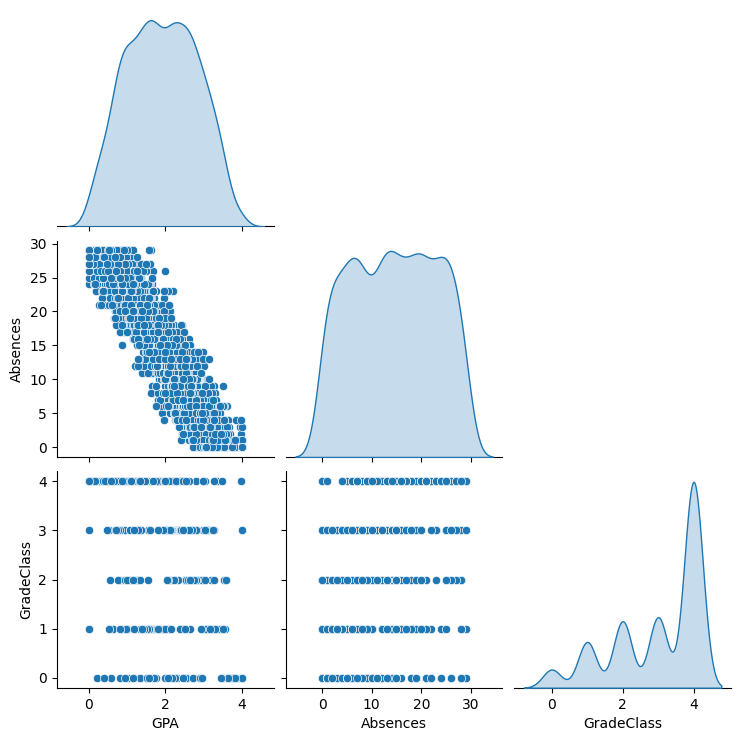

['Absences', 'GradeClass']

In [27]:
plot_features_num_regression(df_estudiantes, target_col="GPA", columns=[], umbral_corr=0.7, pvalue=0.01)

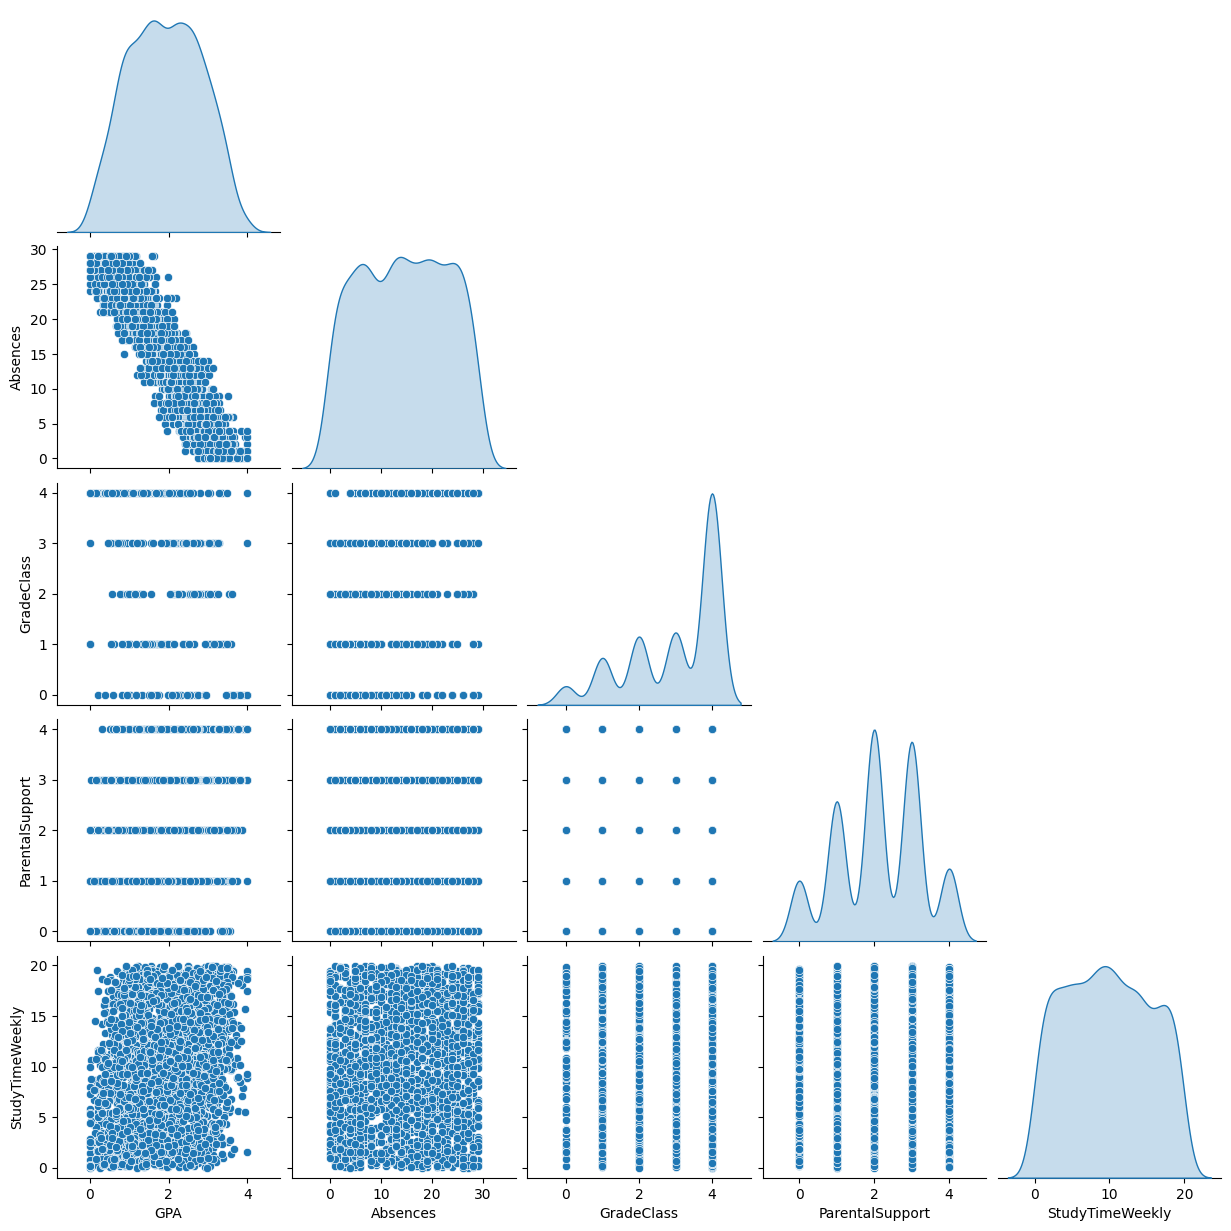

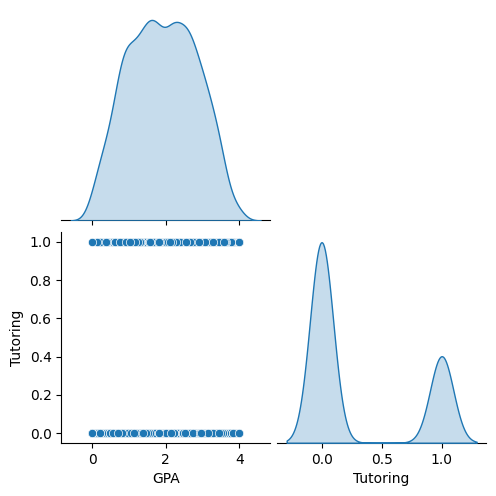

['Absences', 'GradeClass', 'ParentalSupport', 'StudyTimeWeekly', 'Tutoring']

In [28]:
plot_features_num_regression(df_estudiantes, target_col="GPA", columns=[], umbral_corr=0.1, pvalue=0.01)

----------------------

### Testeo de la función ***get_features_cat_regression()***

In [29]:
# No entiendo exactamente qué se supone que debe hacer esta función. El enunciado pide que el target sea numérico continuo y que devolvamos 
# las columnas categóricas que pasen por el pvalue, pero no es posible hacer correlación entre dos variables no numéricas.

In [30]:
df_estudiantes.columns

Index(['Age', 'Gender', 'Ethnicity', 'ParentalEducation', 'StudyTimeWeekly',
       'Absences', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports',
       'Music', 'Volunteering', 'GPA', 'GradeClass'],
      dtype='object')

In [31]:
get_features_cat_regression(df_estudiantes, "GradeClass")


No se encontraron características categóricas en el dataframe.


In [32]:
get_features_cat_regression(df_estudiantes, "GPA")


No se encontraron características categóricas en el dataframe.


In [33]:
mapping = {0:"None", 1:"Low", 2:"Moderate", 3:"High", 4:"Very High"}
df_teste_2 = df_estudiantes.copy()
df_teste_2["ParentalSupport"] = df_teste_2["ParentalSupport"].replace(mapping)

In [34]:
df_teste_2.sample()

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
2224,18,1,2,1,13.738548,7,0,Very High,1,0,0,1,3.253786,3.0


In [35]:
df_teste_2["ParentalSupport"].dtype

dtype('O')

In [36]:
# ahora si deberia ejecutar, pues al minos una columna es categorica

get_features_cat_regression(df_estudiantes, "GPA")

No se encontraron características categóricas en el dataframe.


In [37]:
get_features_cat_regression(df_estudiantes, "ParentalSupport")

No se encontraron características categóricas en el dataframe.


----------------------

### Testeo de la función ***plot_features_cat_regression()***

In [38]:
plot_features_cat_regression(df_estudiantes, target_col="GPA", columns=[], pvalue=0.05, with_individual_plot=False)

No se encontraron características categóricas en el dataframe.


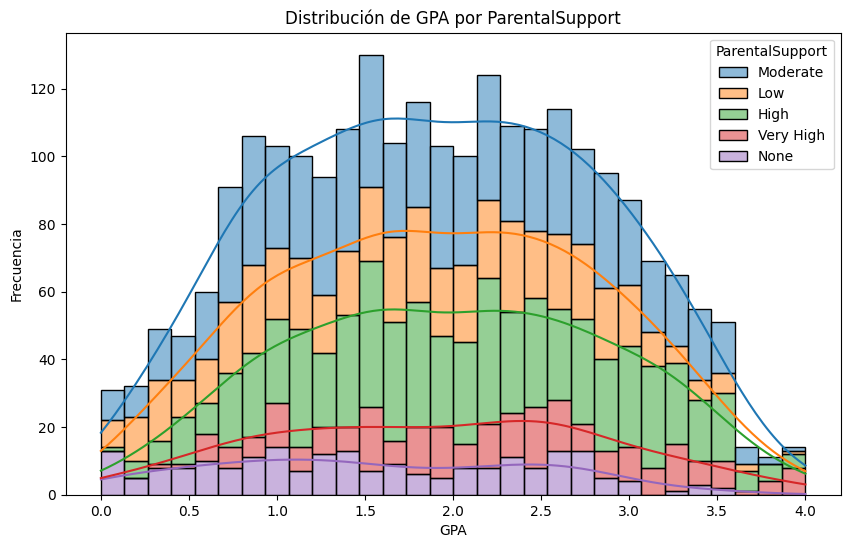

['ParentalSupport']

In [39]:
plot_features_cat_regression(df_teste_2, target_col="GPA", columns=[], pvalue=0.05, with_individual_plot=False)

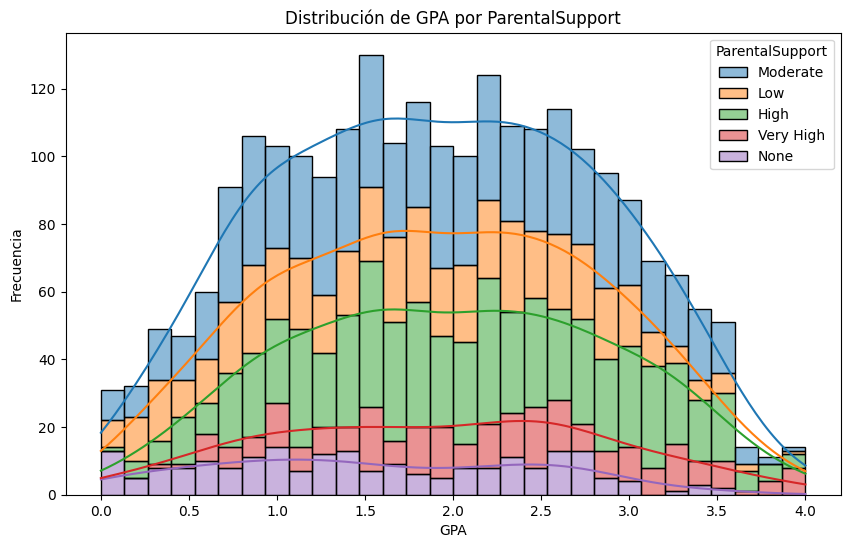

['ParentalSupport']

In [40]:
plot_features_cat_regression(df_teste_2, target_col="GPA", columns=[], pvalue=0.95, with_individual_plot=False)

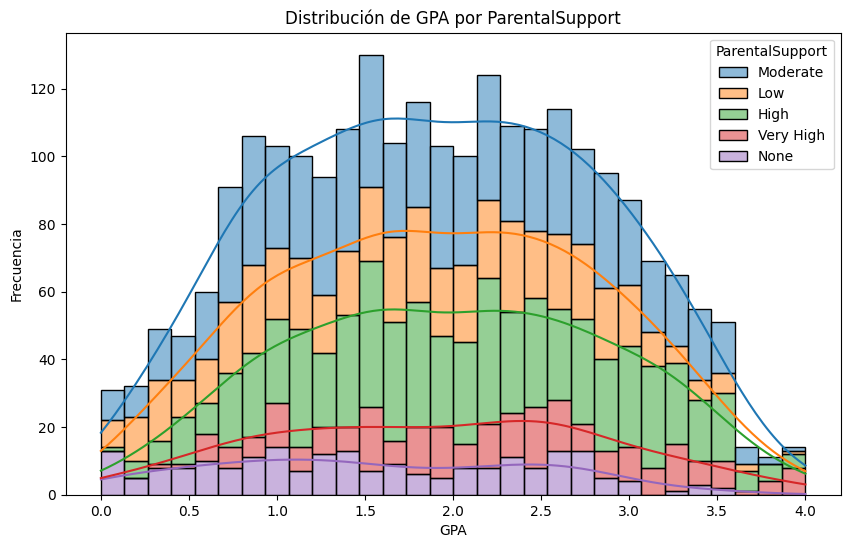

['ParentalSupport']

In [41]:
plot_features_cat_regression(df_teste_2, target_col="GPA", columns=[], pvalue=1, with_individual_plot=False)

In [42]:
# nuevamente no entiendo que cambia en tener o no tener el pvalue como argumento